# Исследование данных и Предобработка данных


In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Загрузка данных
df = pd.read_csv('second_hand_car_sales.csv')

# Первичный осмотр данных
print('Первые пять строк датасета:\n\n',df.head())
print('\nСтруктура датасета:\n')
df.info()
print('\nХарактеристики числовых значений датасета:\n\n',df.describe())

Первые пять строк датасета:

     Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price (£)  
0    61837      34792  
1   128993      27129  
2    81362      29141  
3   168204      24731  
4   119405      27493  

Структура датасета:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine Size (L)      50000 n

In [306]:
rows, columns = df.shape
print(f'Количество строк: {rows}')
print(f'Количество столбцов: {columns}')

print('\nНаименование столбцов: \n',df.columns)

Количество строк: 50000
Количество столбцов: 7

Наименование столбцов: 
 Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price (£)'],
      dtype='object')


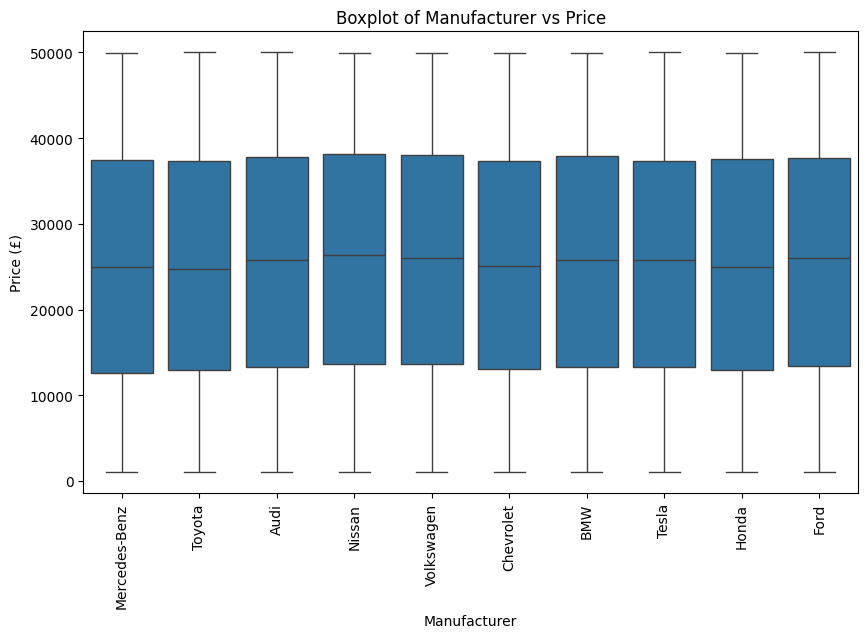

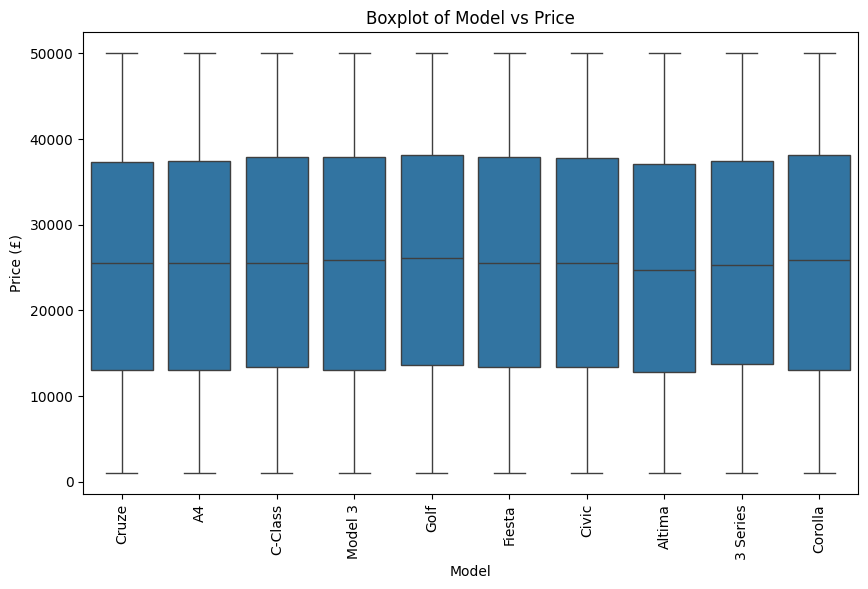

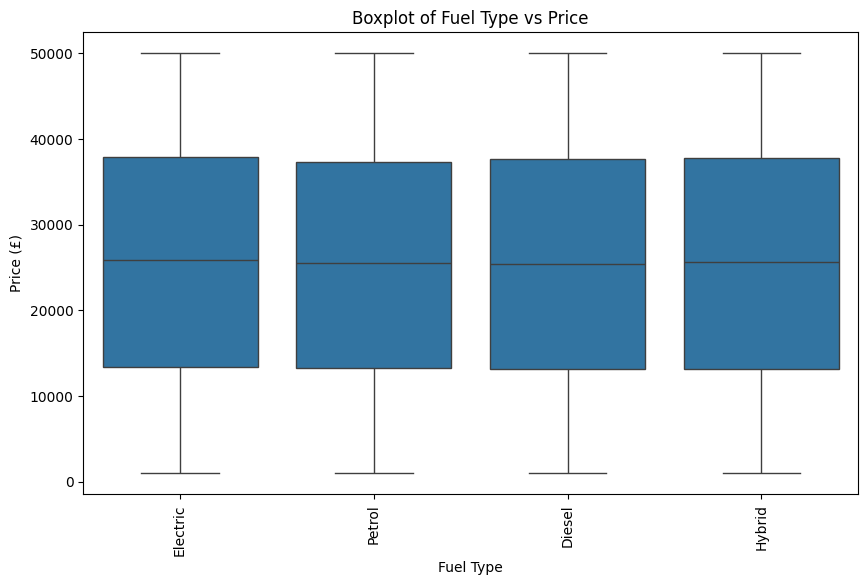

In [310]:
# Усы для категориальных данных

categorical_cols = ['Manufacturer', 'Model', 'Fuel Type']
for col in categorical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=col, y='Price (£)', data=df)
  plt.title(f'Boxplot of {col} vs Price')
  plt.xticks(rotation=90)
  plt.show()

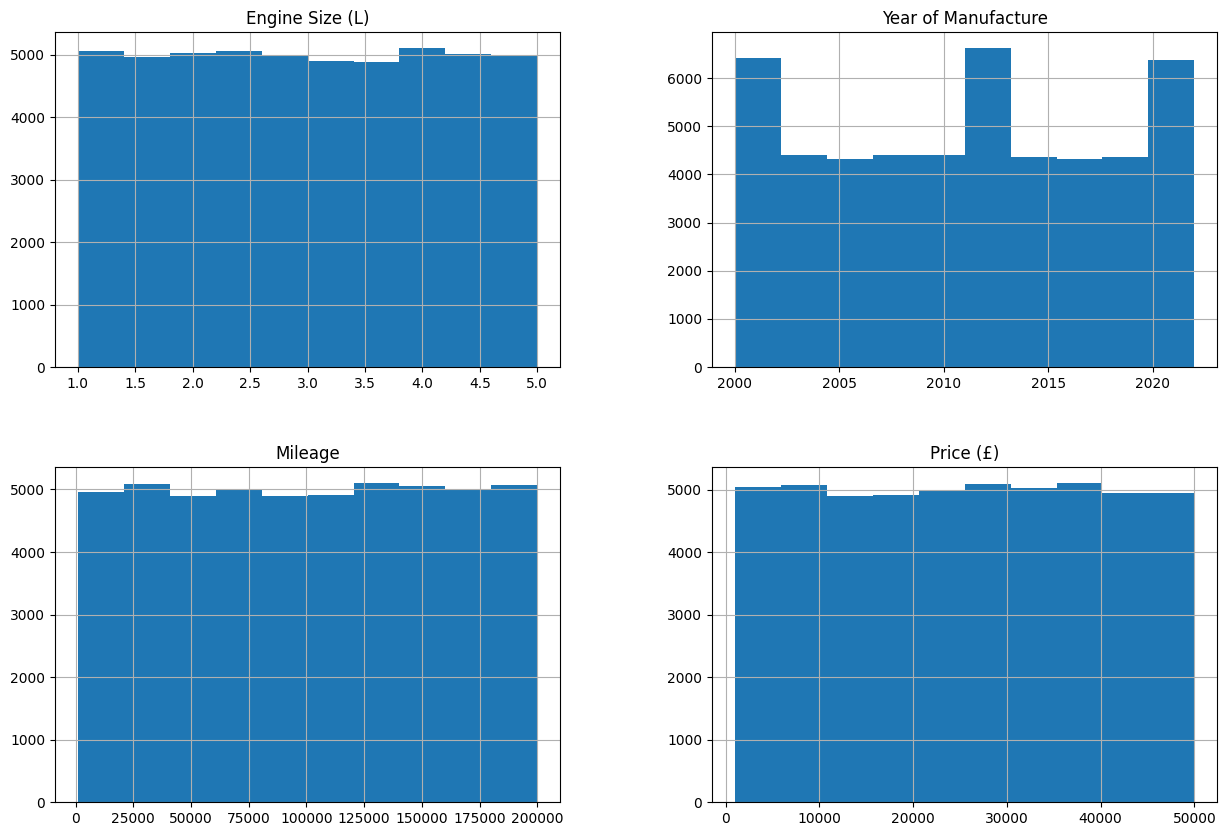

In [78]:
# Гистограммы распределения данных

df.hist(figsize=(15, 10))
plt.show()

In [339]:
# Нормализация данных
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['number']).columns
numerical_features=numerical_features.tolist()

scaler = StandardScaler()
numeric_df = df.select_dtypes(include='number')
df_scaled = scaler.fit_transform(numeric_df)
df_scaled=pd.DataFrame(df_scaled,columns=[numerical_features])
df_drop = df.drop(columns=numerical_features)

#df_norm =pd.merge(df_scaled, df_drop,  left_index=True, right_index=True)
df_norm = pd.concat([df_drop,df_scaled], axis=1)
print('\nНормализованный датафрейм:\n')
df_norm.head()


Нормализованный датафрейм:



,Manufacturer,Model,Fuel Type,"(Engine Size (L),)","(Year of Manufacture,)","(Mileage,)","(Price (£),)"
0,Mercedes-Benz,Cruze,Electric,-1.364852,0.305618,-0.677262,0.659657
1,Toyota,A4,Electric,1.291786,-1.209038,0.489359,0.117439
2,Audi,C-Class,Electric,1.505299,-1.663435,-0.338078,0.259804
3,Nissan,Model 3,Petrol,0.113003,0.002687,1.170525,-0.052239
4,Mercedes-Benz,Golf,Diesel,-1.164512,-0.754641,0.322798,0.143195


In [342]:
# закодируем данные через LabelEncoder
from sklearn.preprocessing import LabelEncoder

category_df = df_norm.select_dtypes(include='object')
categorical_features = category_df.columns.tolist()

encoder_le = LabelEncoder()
for each in categorical_features:
    category_df[each] = encoder_le.fit_transform(category_df[each])
    category_df_check=encoder_le.classes_

numeric_df = df.select_dtypes(include='number')
new_df =pd.merge(numeric_df, category_df,  left_index=True, right_index=True)
print('\nПреобразованный датафрейм:\n')
new_df.head()



Преобразованный датафрейм:



,Engine Size (L),Year of Manufacture,Mileage,Price (£),Manufacturer,Model,Fuel Type
0,1.418475,2013,61837,34792,5,6,1
1,4.492330,2003,128993,27129,8,1,1
2,4.739375,2000,81362,29141,0,3,1
3,3.128423,2011,168204,24731,6,9,3
4,1.650279,2006,119405,27493,5,8,0


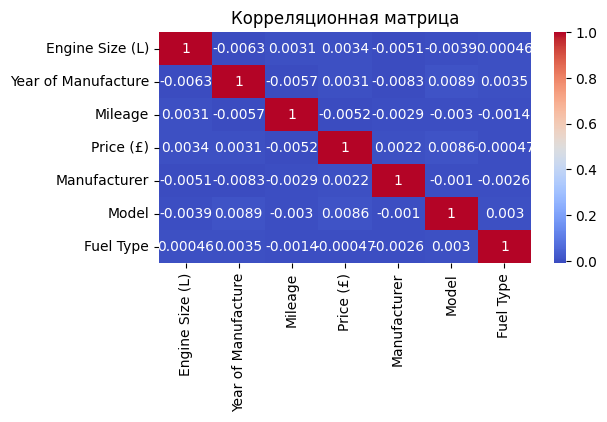

In [343]:
# Корреляционная матрица
plt.figure(figsize=(6, 3))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [344]:
# Проверка на пропущенные значения
missing_values = new_df.isnull().sum()
print("Пропущенные значения в каждом столбце:\n\n", missing_values)

Пропущенные значения в каждом столбце:

 Engine Size (L)        0
Year of Manufacture    0
Mileage                0
Price (£)              0
Manufacturer           0
Model                  0
Fuel Type              0
dtype: int64


# Решение задачи сегментации

In [352]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

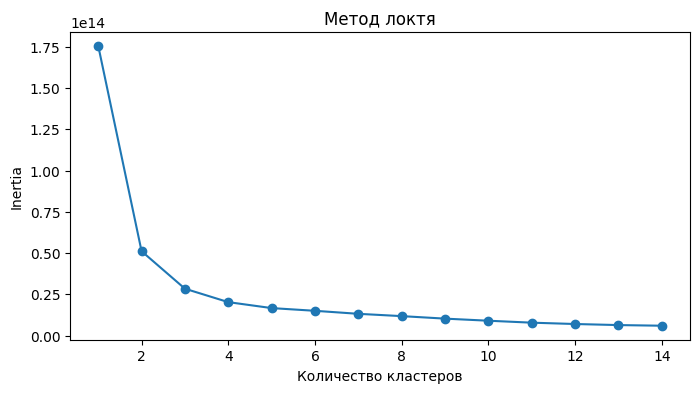

In [348]:
# Определение оптимального количества кластеров с использованием метода "локтя"
inertia = []
for n in range(1, 15):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.show()

In [358]:
kmeans = KMeans(n_clusters=11, random_state=42)
y_kmeans = kmeans.fit_predict(new_df)

 # Оценка метрик
silhouette_avg = silhouette_score(new_df, y_kmeans)
davies_bouldin = davies_bouldin_score(new_df, y_kmeans)
inertia = kmeans.inertia_
calinski_harabasz = calinski_harabasz_score(new_df, y_kmeans)

print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}, Inertia: {inertia:.2f}, Calinski-Harabasz Index: {calinski_harabasz:.2f}")


Number of clusters: 11, Silhouette Score: 0.37, Davies-Bouldin Index: 0.85, Inertia: 7782400370936.25, Calinski-Harabasz Index: 107841.64


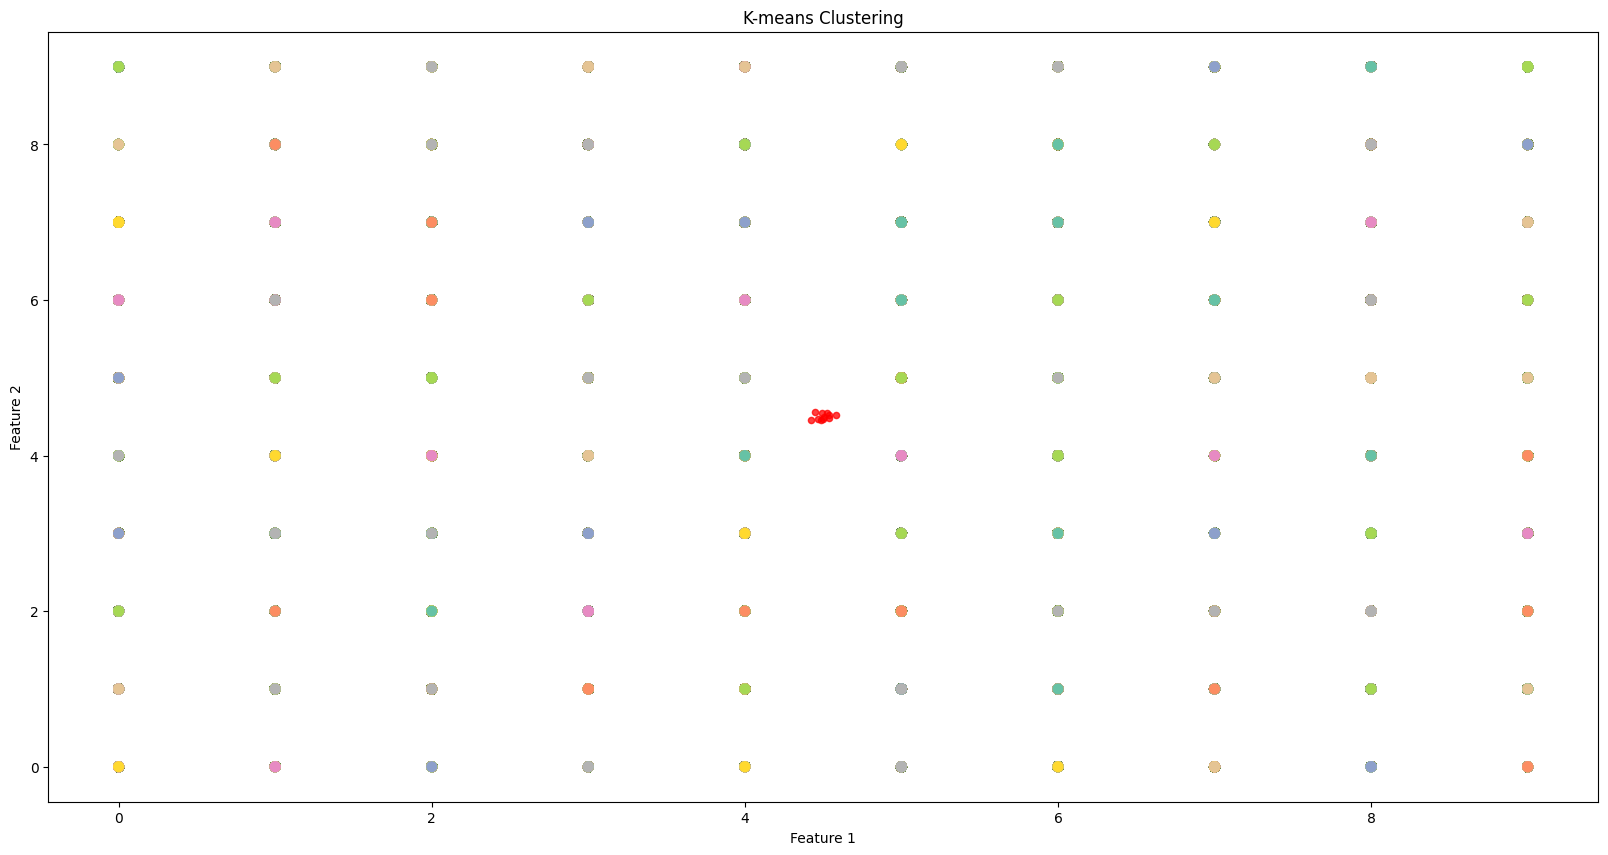

In [354]:
# Визуализируем результаты
plt.figure(figsize=(20,10))
plt.scatter(new_df.iloc[:, 4], new_df.iloc[:, 5], c=y_kmeans, s=50, cmap='Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 5], c='red', s=20, alpha=0.75)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [368]:
new_df

,Engine Size (L),Year of Manufacture,Mileage,Price (£),Manufacturer,Model,Fuel Type,cluster
0,1.418475,2013,61837,34792,5,6,1,-1
1,4.492330,2003,128993,27129,8,1,1,-1
2,4.739375,2000,81362,29141,0,3,1,-1
3,3.128423,2011,168204,24731,6,9,3,-1
4,1.650279,2006,119405,27493,5,8,0,-1
...,...,...,...,...,...,...,...,...
49995,1.241130,2021,163295,1110,2,5,0,-1
49996,3.741902,2012,85805,27877,6,4,1,-1
49997,2.501539,2016,187733,42132,8,2,2,-1
49998,2.066934,2022,136728,39121,3,9,1,-1


In [372]:
from sklearn.cluster import DBSCAN

# Применение DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)
y_dbscan = dbscan.fit_predict(new_df)

dbscan_s = silhouette_score(new_df,y_dbscan)
dbscan_d = davies_bouldin_score(new_df,y_dbscan)
dbscan_c = calinski_harabasz_score(new_df,y_dbscan)

print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'DBSCAN Davies-Bouldin Score: {dbscan_davies:.2f}')
print(f'DBSCAN Calinski-Harabasz Score: {dbscan_calinski}')


# Присвоение меток кластеров к исходному датасету
new_df['cluster'] = clusters

# Обзор результатов кластеризации
print(new_df.head())


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)